# CMIP6 Historical model runs
This script opens up all the CMIP6 historical model run files with data on precipitation pr and surface temperature tas and loops over the files.


In [1]:
import xarray as xr, matplotlib.pyplot as plt
#import sys 
#sys.path.append('') # use this if the function file is in a different directory to the notebook
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
import seaborn as sns

In [42]:
# import custom functions
import anomaly_function as func # imports the function
import model_figures as func2

In [2]:
# use this to reload the function file if I make any edits to it
func = reload(func) 

In [3]:
# store each section of the directory as a string
institution_dir = '/g/data/lp01/CMIP6/CMIP/'
tas_dir = '/historical/r1i1p1f1/Amon/tas/gr1.5/'
pr_dir = '/historical/r1i1p1f1/Amon/pr/gr1.5/'
print(institution_dir, tas_dir, pr_dir)

/g/data/lp01/CMIP6/CMIP/ /historical/r1i1p1f1/Amon/tas/gr1.5/ /historical/r1i1p1f1/Amon/pr/gr1.5/


In [4]:
models_tas = func.read_models(institution_dir, tas_dir, '1850-01','2015-01')

45 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/tas/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/tas/gr1.5/v20190919/*.nc
Model MPI-ESM1-2-HR has different time so is now removed
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/tas/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/tas/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/tas/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p1f1/Amon/tas/gr1.5/v20190818/*.nc
BCC-ESM1 

In [5]:
models_pr = func.read_models(institution_dir, pr_dir, '1850-01','2015-01')

45 model paths found and loaded into the dictionary "models"
MPI-ESM-1-2-HAM /g/data/lp01/CMIP6/CMIP/HAMMOZ-Consortium/MPI-ESM-1-2-HAM/historical/r1i1p1f1/Amon/pr/gr1.5/v20190627/*.nc
NESM3 /g/data/lp01/CMIP6/CMIP/NUIST/NESM3/historical/r1i1p1f1/Amon/pr/gr1.5/v20190630/*.nc
Path for MCM-UA-1-0 does not exist
ACCESS-CM2 /g/data/lp01/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/pr/gr1.5/v20190919/*.nc
MPI-ESM1-2-HR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
MPI-ESM1-2-LR /g/data/lp01/CMIP6/CMIP/MPI-M/MPI-ESM1-2-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20190710/*.nc
IPSL-CM6A-LR /g/data/lp01/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/Amon/pr/gr1.5/v20180803/*.nc
CAS-ESM2-0 /g/data/lp01/CMIP6/CMIP/CAS/CAS-ESM2-0/historical/r1i1p1f1/Amon/pr/gr1.5/v20200302/*.nc
FGOALS-f3-L /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-f3-L/historical/r1i1p1f1/Amon/pr/gr1.5/v20190927/*.nc
FGOALS-g3 /g/data/lp01/CMIP6/CMIP/CAS/FGOALS-g3/historical/r1i1p

In [6]:
# make sure the models are the same for both vairables
# delete the height from the models_tas array (if it hasn't been deleted already)
if 'height' in models_tas:
    del models_tas['height']
# delete models that aren't common between variables
models_tas = models_tas.where(models_tas.model.isin(models_pr.model), drop = True)
models_pr = models_pr.where(models_pr.model.isin(models_tas.model), drop = True)
#chekc that the models are the same for both variables and if so print True
models_tas.model.equals(models_pr.model)

True

In [7]:
# print final model list
print(models_tas.model.data)

['MPI-ESM-1-2-HAM' 'NESM3' 'ACCESS-CM2' 'MPI-ESM1-2-LR' 'IPSL-CM6A-LR'
 'CAS-ESM2-0' 'FGOALS-f3-L' 'FGOALS-g3' 'BCC-ESM1' 'BCC-CSM2-MR' 'CIESM'
 'TaiESM1' 'KACE-1-0-G' 'CMCC-CM2-SR5' 'GISS-E2-1-G-CC' 'GISS-E2-1-H'
 'GISS-E2-1-G' 'AWI-CM-1-1-MR' 'AWI-ESM-1-1-LR' 'MIROC6' 'MRI-ESM2-0'
 'FIO-ESM-2-0' 'CanESM5' 'ACCESS-ESM1-5' 'GFDL-CM4' 'GFDL-ESM4' 'E3SM-1-1'
 'E3SM-1-1-ECA' 'INM-CM4-8' 'INM-CM5-0' 'EC-Earth3-Veg-LR' 'EC-Earth3'
 'NorCPM1' 'NorESM2-MM' 'CAMS-CSM1-0' 'CESM2' 'CESM2-WACCM' 'CESM2-FV2'
 'CESM2-WACCM-FV2' 'SAM0-UNICON']


In [8]:
# combine precipitation and temperature into one dataset
models = xr.Dataset({'tas': models_tas.tas, 'pr': models_pr.pr})
# change the pr units
models['pr'] = models.pr*86400
models

,Array,Chunk
Bytes,9.12 GB,228.10 MB
Shape,"(40, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,325 Tasks,40 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,18.25 GB,456.19 MB
Shape,"(40, 1980, 120, 240)","(1, 1980, 120, 240)"
Count,365 Tasks,40 Chunks
Type,float64,numpy.ndarray


Right now I have all the models stored in one array so from hereafter I can calculate anomalies etc.  

In [9]:
# area weighting 
models_w = models*np.cos(models.lat*(np.pi/180))

In [10]:
# eruption date
e_date = ['1883-08','1902-10', '1963-03', '1982-04', '1991-06']
e_pre5yrs = ['1878-08','1897-10', '1958-03', '1977-04', '1986-06']
e_pre3mon = ['1883-05','1902-7', '1962-12', '1982-01', '1991-03']
e_post5yrs = ['1888-08','1907-10', '1968-03', '1987-04', '1996-06']

In [11]:
# eruption names
volcanoes = ['Krakatau', 'Santa Maria','Agung','El Chichon', 'Pinatubo']

In [12]:
# select out hte 10 year time frame around each eruption (5yrs before and after)
# tas
Krakatau = models_w.sel(time = slice(e_pre5yrs[0], e_post5yrs[0]))
SantaMaria = models_w.sel(time = slice(e_pre5yrs[1], e_post5yrs[1]))
Agung = models_w.sel(time = slice(e_pre5yrs[2], e_post5yrs[2]))
ElChicon = models_w.sel(time = slice(e_pre5yrs[3], e_post5yrs[3]))
Pinatubo = models_w.sel(time = slice(e_pre5yrs[4], e_post5yrs[4]))

In [13]:
# combine eruptions into one array


In [14]:
# select out the northern and sourhern hemisphere regions
Krakatau_SH = Krakatau.sel(lat=slice(-90,0))
Krakatau_NH = Krakatau.sel(lat=slice(0,90))

SantaMaria_SH = SantaMaria.sel(lat=slice(-90,0))
SantaMaria_NH = SantaMaria.sel(lat=slice(0,90))

Agung_SH = Agung.sel(lat=slice(-90,0))
Agung_NH = Agung.sel(lat=slice(0,90))

ElChicon_SH = ElChicon.sel(lat=slice(-90,0))
ElChicon_NH = ElChicon.sel(lat=slice(0,90))

Pinatubo_SH = Pinatubo.sel(lat=slice(-90,0))
Pinatubo_NH = Pinatubo.sel(lat=slice(0,90))

In [15]:
# import land fraction data
landfrac_ds = xr.open_dataset('/home/563/kb6999/Models/landfraction_file_grid1.5.nc')
landmask = landfrac_ds.mean(dim='time')

In [16]:
# this is where I use the land mask and select out the continents
# and I select the Australia region with a lon,lat box and the Eastern Australia region
Krakatau_aus = Krakatau.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
Krakatau_EA = Krakatau.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

SantaMaria_aus = SantaMaria.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
SantaMaria_EA = SantaMaria.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

Agung_aus = Agung.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
Agung_EA = Agung.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

ElChicon_aus = ElChicon.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
ElChicon_EA = ElChicon.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

Pinatubo_aus = Pinatubo.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(110,160)) 
Pinatubo_EA = Pinatubo.where(landmask.data==1, drop=True).sel(lat=slice(-50,-10), lon=slice(140,155))

In [17]:
# use functions to calculate the monthly anomalies for the globe
K_mon_anom_Glob = func.monthly_anomaly(Krakatau, e_pre5yrs[0], e_pre3mon[0])
S_mon_anom_Glob = func.monthly_anomaly(SantaMaria, e_pre5yrs[1], e_pre3mon[1])
A_mon_anom_Glob = func.monthly_anomaly(Agung, e_pre5yrs[2], e_pre3mon[2])
E_mon_anom_Glob = func.monthly_anomaly(ElChicon, e_pre5yrs[3], e_pre3mon[3])
P_mon_anom_Glob = func.monthly_anomaly(Pinatubo, e_pre5yrs[4], e_pre3mon[4])

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

In [18]:
# use functions to calculate the monthly anomalies for the SH
K_mon_anom_SH = func.monthly_anomaly(Krakatau_SH, e_pre5yrs[0], e_pre3mon[0])
S_mon_anom_SH = func.monthly_anomaly(SantaMaria_SH,  e_pre5yrs[1], e_pre3mon[1])
A_mon_anom_SH = func.monthly_anomaly(Agung_SH, e_pre5yrs[2], e_pre3mon[2])
E_mon_anom_SH = func.monthly_anomaly(ElChicon_SH, e_pre5yrs[3], e_pre3mon[3])
P_mon_anom_SH = func.monthly_anomaly(Pinatubo_SH, e_pre5yrs[4], e_pre3mon[4])

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

In [19]:
# use functions to calculate the monthly anomalies for Aus 
K_mon_anom_Aus = func.monthly_anomaly(Krakatau_aus, e_pre5yrs[0], e_pre3mon[0])
S_mon_anom_Aus = func.monthly_anomaly(SantaMaria_aus, e_pre5yrs[1], e_pre3mon[1])
A_mon_anom_Aus = func.monthly_anomaly(Agung_aus, e_pre5yrs[2], e_pre3mon[2])
E_mon_anom_Aus = func.monthly_anomaly(ElChicon_aus, e_pre5yrs[3], e_pre3mon[3])
P_mon_anom_Aus = func.monthly_anomaly(Pinatubo_aus, e_pre5yrs[4], e_pre3mon[4])

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

In [20]:
# use functions to calculate the monthly anomalies for EA 
K_mon_anom_EA = func.monthly_anomaly(Krakatau_EA, e_pre5yrs[0], e_pre3mon[0])
S_mon_anom_EA = func.monthly_anomaly(SantaMaria_EA, e_pre5yrs[1], e_pre3mon[1])
A_mon_anom_EA = func.monthly_anomaly(Agung_EA, e_pre5yrs[2], e_pre3mon[2])
E_mon_anom_EA = func.monthly_anomaly(ElChicon_EA, e_pre5yrs[3], e_pre3mon[3])
P_mon_anom_EA = func.monthly_anomaly(Pinatubo_EA, e_pre5yrs[4], e_pre3mon[4])

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1343: PerformanceWarning: Slicing with an out-of-order index is generating 11 times more chunks
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-pack

In [21]:
# reset the time array so eruption time corresponds to 0 and store all eruptions in one composite array
composite_mon_Glob = func.reset_time(K_mon_anom_Glob, S_mon_anom_Glob, A_mon_anom_Glob, E_mon_anom_Glob, P_mon_anom_Glob, volcanoes)
composite_mon_SH = func.reset_time(K_mon_anom_SH, S_mon_anom_SH, A_mon_anom_SH, E_mon_anom_SH, P_mon_anom_SH, volcanoes)
composite_mon_Aus = func.reset_time(K_mon_anom_Aus, S_mon_anom_Aus, A_mon_anom_Aus, E_mon_anom_Aus, P_mon_anom_Aus, volcanoes)
composite_mon_EA = func.reset_time(K_mon_anom_EA, S_mon_anom_EA, A_mon_anom_EA, E_mon_anom_EA, P_mon_anom_EA, volcanoes)


In [22]:
# take the mean in lat and lon for monthly anomalies
composite_mean_Glob = composite_mon_Glob.mean(dim=('lat','lon'))
composite_mean_SH = composite_mon_SH.mean(dim=('lat','lon'))
composite_mean_Aus = composite_mon_Aus.mean(dim=('lat','lon'))
composite_mean_EA = composite_mon_EA.mean(dim=('lat','lon'))

In [23]:
# calculate the monthly model mean for monthly anomalies
composite_mmm_Glob = composite_mean_Glob.mean(dim='model')
composite_mmm_SH = composite_mean_SH.mean(dim='model')
composite_mmm_Aus = composite_mean_Aus.mean(dim='model')
composite_mmm_EA = composite_mean_EA.mean(dim='model')

In [24]:
# take the composite over all volcanoes
V_composite_mmm_Glob = composite_mmm_Glob.mean(dim='volcano')
V_composite_mmm_SH = composite_mmm_SH.mean(dim='volcano')
V_composite_mmm_Aus = composite_mmm_Aus.mean(dim='volcano')
V_composite_mmm_EA = composite_mmm_EA.mean(dim='volcano')

In [25]:
# calculate percentile
# 10th percentile
p10_Glob = composite_mean_Glob.chunk({'model': -1,'volcano': -1}).quantile(0.1, dim=['model', 'volcano'])
p10_SH = composite_mean_SH.chunk({'model': -1,'volcano': -1}).quantile(0.1, dim=['model', 'volcano'])
p10_Aus = composite_mean_Aus.chunk({'model': -1,'volcano': -1}).quantile(0.1, dim=['model', 'volcano'])
p10_EA = composite_mean_EA.chunk({'model': -1,'volcano': -1}).quantile(0.1, dim=['model', 'volcano'])

# 90th percentile
p90_Glob = composite_mean_Glob.chunk({'model': -1,'volcano': -1}).quantile(0.9, dim=['model', 'volcano'])
p90_SH = composite_mean_SH.chunk({'model': -1,'volcano': -1}).quantile(0.9, dim=['model', 'volcano'])
p90_Aus = composite_mean_Aus.chunk({'model': -1,'volcano': -1}).quantile(0.9, dim=['model', 'volcano'])
p90_EA = composite_mean_EA.chunk({'model': -1,'volcano': -1}).quantile(0.9, dim=['model', 'volcano'])

In [26]:
# calculate standard deviation
std_Glob = func.std_bounds_MV(composite_mean_Glob, V_composite_mmm_Glob)
std_SH = func.std_bounds_MV(composite_mean_SH, V_composite_mmm_SH)
std_Aus = func.std_bounds_MV(composite_mean_Aus, V_composite_mmm_Aus)
std_EA = func.std_bounds_MV(composite_mean_EA, V_composite_mmm_EA)

# check difference between std and per
## Figures

In [27]:
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [28]:
CB_color_cycle = sns.color_palette("Blues_r")


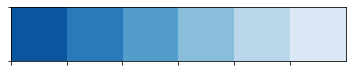

In [29]:
sns.palplot(sns.color_palette("Blues_r"))

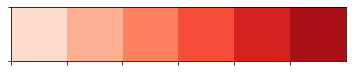

In [30]:
sns.palplot(sns.color_palette("Reds"))

## i'm to here with editing!! I need to put the right inputs in for hte cell below and then keep going and do graphs etc for all regions

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

IndexError: list index out of range

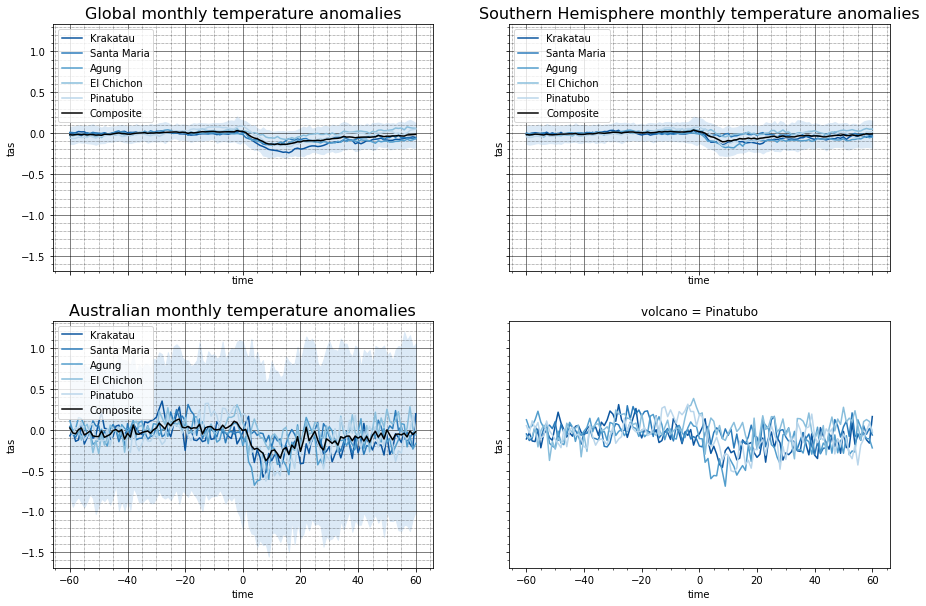

In [31]:

fig, ax = plt.subplots(2,2, sharex=True, sharey=True, figsize=(15,10)) # make a figure

ax[0,0].set_ylabel('Temperature anomaly [C]') # this overrides the label which comes on automatically using the xarray title
ax[0,0].set_xlabel('Month relative to eruption') # this overrides the label which comes on automatically using the xarray title

# SUBPLOT 1
i=0
# loop over all eruptions and plot the seasonal anomalies on one graph
for v in composite_mmm_Glob.volcano:
    composite_mmm_Glob.sel(volcano=v).tas.plot(ax=ax[0,0], label = v.data, color = CB_color_cycle[i]) # plot the anomalies
    i = i+1

ax[0,0].fill_between(p10_Glob.time.data, p10_Glob.tas.data, p90_Glob.tas.data, color=CB_color_cycle[i])

V_composite_mmm_Glob.tas.plot(color = 'k', ax=ax[0,0], label = 'Composite') 
ax[0,0].set_title('Global monthly temperature anomalies', fontsize=16)

ax[0,0].set_facecolor('white')
ax[0,0].legend(loc="upper left")
ax[0,0].grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax[0,0].minorticks_on() # need this line in order to get the minor grid lines 
ax[0,0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# SUBPLOT 2
i=0
# loop over all eruptions and plot the seasonal anomalies on one graph
for v in composite_mmm_SH.volcano:
    composite_mmm_SH.sel(volcano=v).tas.plot(ax=ax[0,1], label = v.data, color = CB_color_cycle[i]) # plot the anomalies
    i = i+1

ax[0,1].fill_between(p10_SH.time.data, p10_SH.tas.data, p90_SH.tas.data, color=CB_color_cycle[i])

V_composite_mmm_SH.tas.plot(color = 'k', ax=ax[0,1], label = 'Composite') 
ax[0,1].set_title('Southern Hemisphere monthly temperature anomalies', fontsize=16)

ax[0,1].set_facecolor('white')
ax[0,1].legend(loc="upper left")
ax[0,1].grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax[0,1].minorticks_on() # need this line in order to get the minor grid lines 
ax[0,1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# SUBPLOT 3
i=0
# loop over all eruptions and plot the seasonal anomalies on one graph
for v in composite_mmm_Aus.volcano:
    composite_mmm_Aus.sel(volcano=v).tas.plot(ax=ax[1,0], label = v.data, color = CB_color_cycle[i]) # plot the anomalies
    i = i+1

ax[1,0].fill_between(p10_Aus.time.data, p10_Aus.tas.data, p90_Aus.tas.data, color=CB_color_cycle[i])

V_composite_mmm_Aus.tas.plot(color = 'k', ax=ax[1,0], label = 'Composite') 
ax[1,0].set_title('Australian monthly temperature anomalies', fontsize=16)

ax[1,0].set_facecolor('white')
ax[1,0].legend(loc="upper left")
ax[1,0].grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax[1,0].minorticks_on() # need this line in order to get the minor grid lines 
ax[1,0].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# SUBPLOT 4
i=0
# loop over all eruptions and plot the seasonal anomalies on one graph
for v in composite_mmm_EA.volcano:
    composite_mmm_EA.sel(volcano=v).tas.plot(ax=ax[1,1], label = v.data, color = CB_color_cycle[i]) # plot the anomalies
    i = i+1

ax[1,1].fill_between(p10_EA.time.data, p10_EA.tas.data, p90_EA.tas.data, color=CB_color_cycle[i])

V_composite_mmm_EA.tas.plot(color = 'k', ax=ax[1,1], label = 'Composite') 
ax[1,1].set_title('Eastern Australian monthly temperature anomalies', fontsize=16)

ax[1,1].set_facecolor('white')
ax[1,1].legend(loc="upper left")
ax[1,1].grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax[1,1].minorticks_on() # need this line in order to get the minor grid lines 
ax[1,1].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# #plt.savefig('composite_mon_tas_glob.png', dpi=300)

In [ ]:
fig, ax = plt.subplots() # make a figure

# loop over all eruptions and plot the seasonal anomalies on one graph
for v in composite_mmm_Glob.volcano:
    composite_mmm_Glob.sel(volcano=v).pr.plot(ax=ax, label = v.data) # plot the anomalies
    
ax.fill_between(p10_Glob.time.data, p10_Glob.pr.data, p90_Glob.pr.data, color='grey')

V_composite_mmm_Glob.pr.plot(color = 'k', ax=ax, label = 'Composite') 
plt.title('Global monthly precipitation anomalies', fontsize=16)
plt.ylabel('Precipitation anomaly [mm/day]') # this overrides the label which comes on automatically using the xarray title
plt.xlabel('Month relative to eruption') # this overrides the label which comes on automatically using the xarray title

ax.legend(loc="upper left")
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black') # customise major grid
ax.minorticks_on() # need this line in order to get the minor grid lines 
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

fig.set_figheight(8) # these two parameters change the figure height and width 
fig.set_figwidth(15)

plt.savefig('composite_mon_pr_glob.png', dpi=300)

In [47]:
func2 = reload(func2)

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,10))

func2.SEA_plots(composite_mmm_Glob.pr, V_composite_mmm_Glob.pr, p10_Glob.pr, p90_Glob.pr, ax = axes[0,0])
func2.SEA_plots(composite_mmm_SH.pr, V_composite_mmm_SH.pr, p10_SH.pr, p90_SH.pr, ax = axes[0,1])
func2.SEA_plots(composite_mmm_Aus.pr, V_composite_mmm_Aus.pr, p10_Aus.pr, p90_Aus.pr, ax = axes[1,0])
func2.SEA_plots(composite_mmm_EA.pr, V_composite_mmm_EA.pr, p10_EA.pr, p90_EA.pr, ax = axes[1,1])

#plt.ylabel('Precipitation anomaly [mm/day]') # only does label on last plot!!
#fig.ylabel('Precipitation anomaly [mm/day]') # doesn't work cos fig has no attribute ylabel , maybe need set_ylabel?
axes.xlabel('Month relative to eruption') # this overrides the label which comes on automatically using the xarray title

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1,

AttributeError: 'numpy.ndarray' object has no attribute 'set'

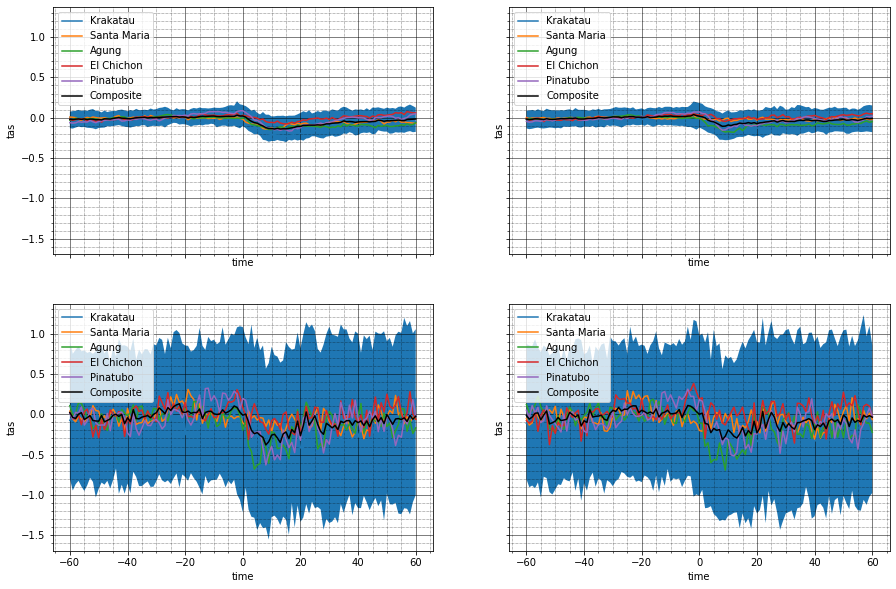

In [51]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,10))

func2.SEA_plots(composite_mmm_Glob.tas, V_composite_mmm_Glob.tas, p10_Glob.tas, p90_Glob.tas, ax = axes[0,0])
func2.SEA_plots(composite_mmm_SH.tas, V_composite_mmm_SH.tas, p10_SH.tas, p90_SH.tas, ax = axes[0,1])
func2.SEA_plots(composite_mmm_Aus.tas, V_composite_mmm_Aus.tas, p10_Aus.tas, p90_Aus.tas, ax = axes[1,0])
func2.SEA_plots(composite_mmm_EA.tas, V_composite_mmm_EA.tas, p10_EA.tas, p90_EA.tas, ax = axes[1,1])

#axes.set(ylabel = 'Temperature anomaly [C]') # this is wrong, numpy has no attribute .set 
axes.set_xlabel('Month relative to eruption') # this overrides the label which comes on automatically using the xarray title